In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\unclean_smartwatch_health_data.csv")
df.head(4)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3


In [3]:
print(df.shape)
df.isnull().sum()

(10000, 7)


User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

In [4]:
df['User ID'].fillna(df['User ID'].mode()[0], inplace=True)

In [5]:
for col in df.select_dtypes(include='float64').columns:
    df[col] = df[col].fillna(df[col].mean())

In [6]:
print(df.shape)
df.isnull().sum()

(10000, 7)


User ID                     0
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

In [7]:
df['Sleep Duration (hours)'].unique()

array(['7.167235622316564', '6.538239375570314', 'ERROR', ...,
       '6.91654920303435', '5.691233932149209', '5.691001039740254'],
      dtype=object)

In [8]:
df['Sleep Duration (hours)'] = pd.to_numeric(df['Sleep Duration (hours)'], errors='coerce')

In [9]:
df.head()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167236,Highly Active,1
1,3708.0,76.035462,98.532195,727.601610,6.538239,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,NaN,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367790,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6


In [10]:
df['Stress Level'].unique()

array(['1', '5', '3', '6', '10', '2', '8', '9', nan, '4', 'Very High',
       '7'], dtype=object)

In [11]:
df['Stress Level'] = df['Stress Level'].str.replace("Very High", "10")
df['Stress Level'] = df['Stress Level'].fillna(df['Stress Level'].mode()[0])
df['Stress Level'] = df['Stress Level'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 10000 non-null  float64
 1   Heart Rate (BPM)        10000 non-null  float64
 2   Blood Oxygen Level (%)  10000 non-null  float64
 3   Step Count              10000 non-null  float64
 4   Sleep Duration (hours)  9603 non-null   float64
 5   Activity Level          9800 non-null   object 
 6   Stress Level            10000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 547.0+ KB


In [13]:
df['Sleep Duration (hours)'].fillna(df['Sleep Duration (hours)'].mean(), inplace=True)

In [14]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(drop='first')
df['Activity Level'] = oh.fit_transform(df[['Activity Level']]).toarray()

In [15]:
df.isnull().sum()

User ID                   0
Heart Rate (BPM)          0
Blood Oxygen Level (%)    0
Step Count                0
Sleep Duration (hours)    0
Activity Level            0
Stress Level              0
dtype: int64

In [16]:
df = df[[col for col in df.columns if col != 'Activity Level'] + ['Activity Level']]
df.describe()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Stress Level,Activity Level
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3021.560700,76.035462,97.841581,6985.685885,6.505463,5.417000,0.162200
std,1143.193956,19.020232,1.706669,6851.290665,1.479748,2.894676,0.368653
min,1001.000000,40.000000,90.791208,0.910138,-0.194453,1.000000,0.000000
25%,2016.000000,65.322796,96.703718,2037.300857,5.541519,3.000000,0.000000
50%,3040.000000,76.035462,97.933416,5023.631772,6.505463,5.000000,0.000000
75%,3985.000000,84.791711,99.327856,9680.097095,7.476227,8.000000,0.000000
max,4999.000000,296.593970,100.000000,62486.690753,12.140233,10.000000,1.000000


In [17]:
df = df.drop(columns=['User ID']) 

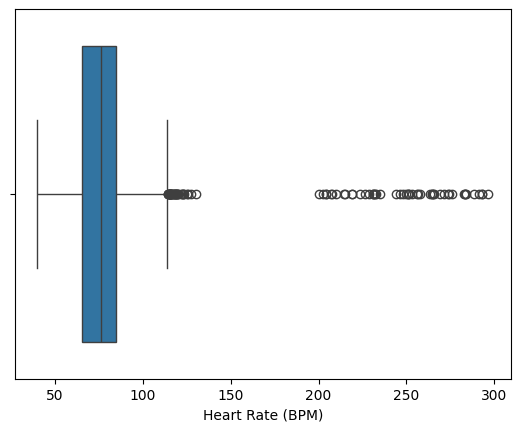

In [18]:
sns.boxplot(x=df['Heart Rate (BPM)'])
plt.show()

In [19]:
q1 = df['Heart Rate (BPM)'].quantile(0.25)
q3 = df['Heart Rate (BPM)'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - 1.5*iqr
max_range = q3 + 1.5*iqr

df = df[df['Heart Rate (BPM)']<max_range]

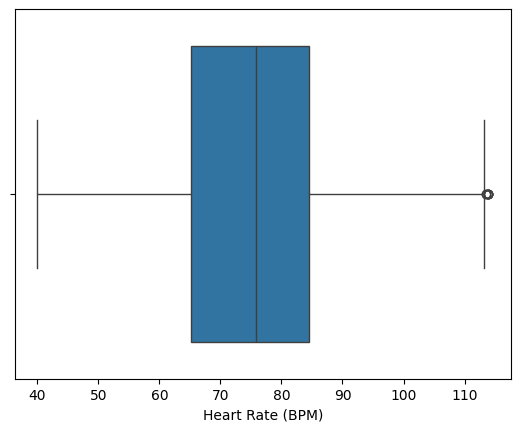

In [20]:
sns.boxplot(x=df['Heart Rate (BPM)'])
plt.show()

In [21]:
q1 = df['Step Count'].quantile(0.25)
q3 = df['Step Count'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - 1.5*iqr
max_range = q3 + 1.5*iqr

df = df[df['Step Count']<max_range]

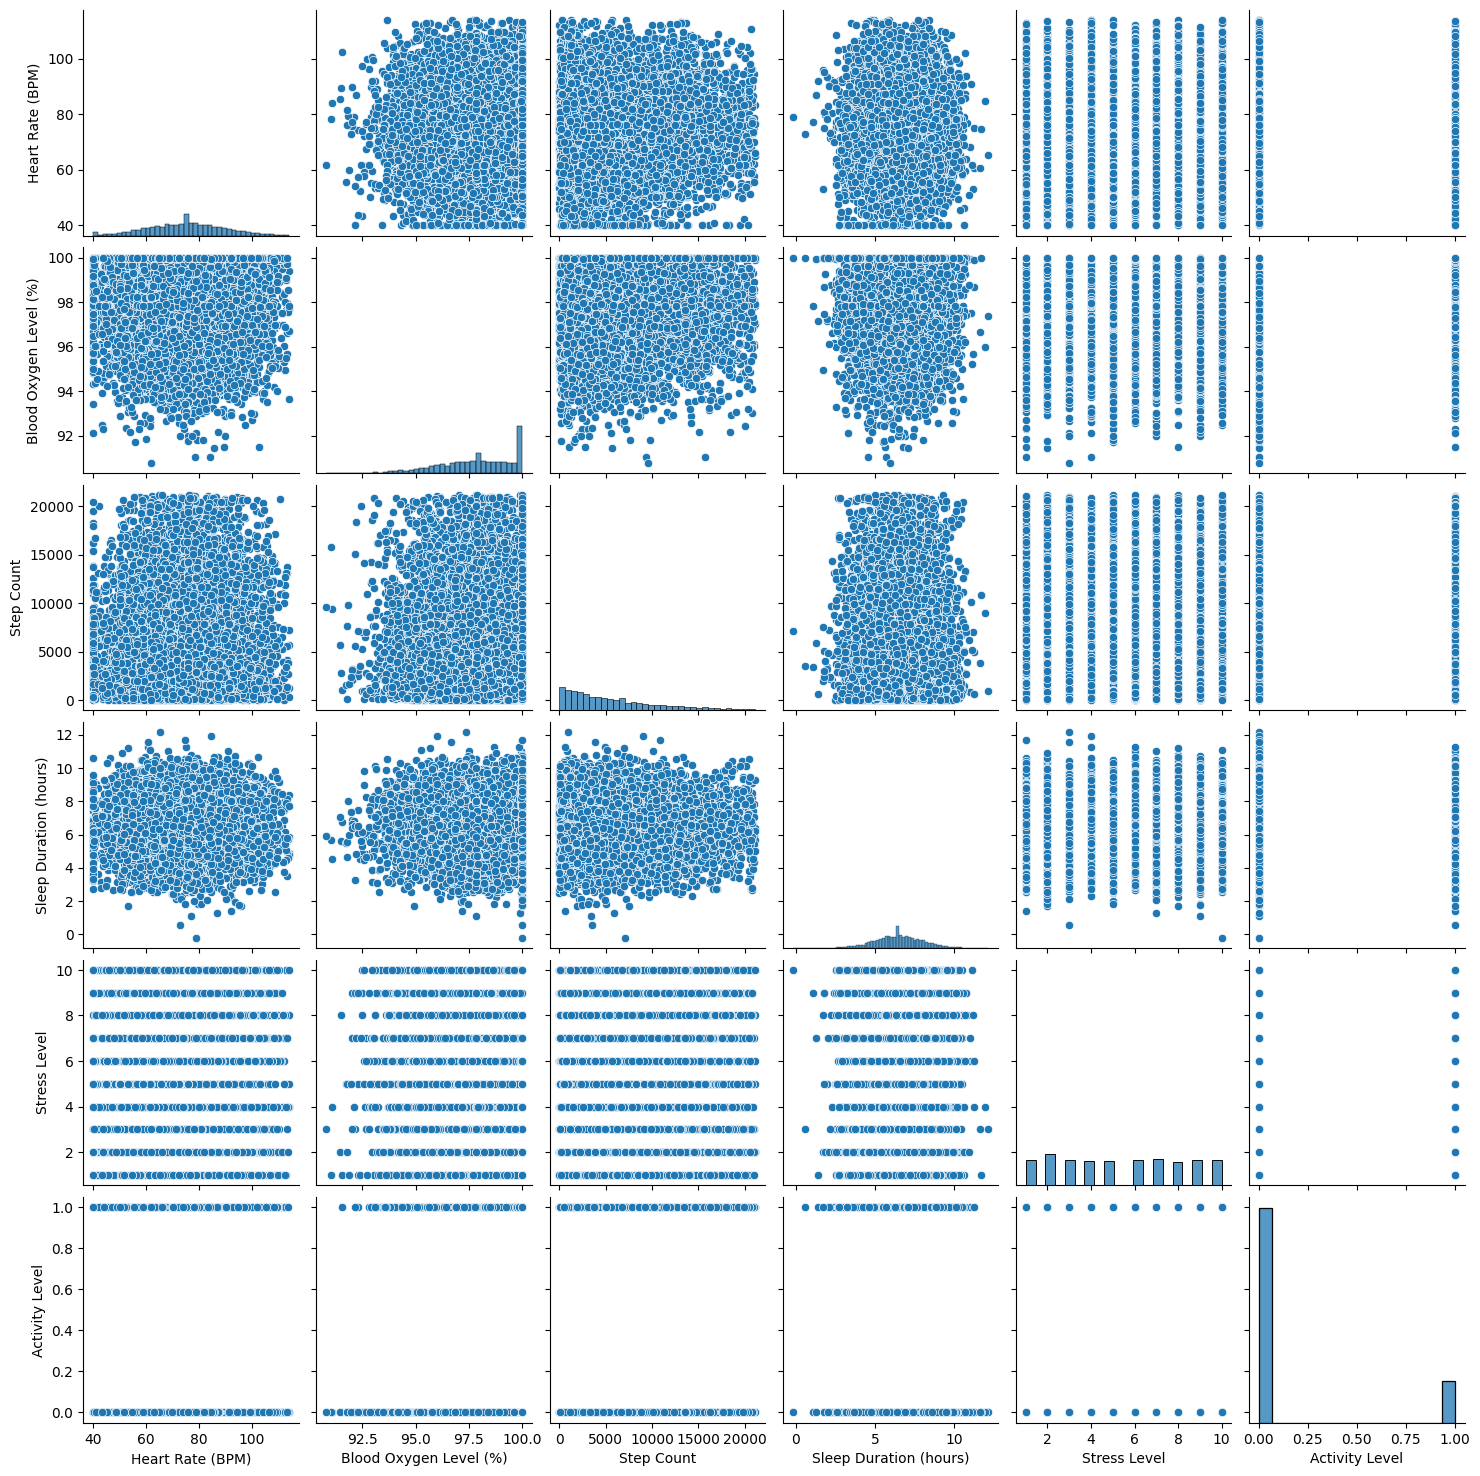

In [22]:
sns.pairplot(data=df)
plt.show()

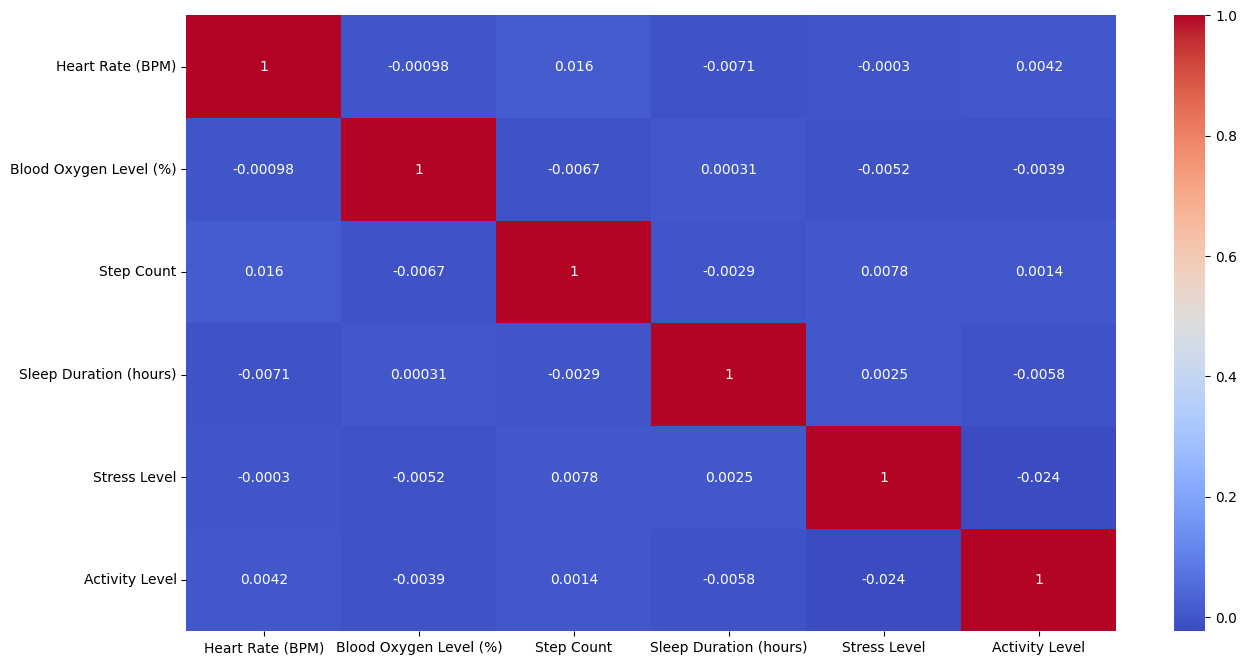

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
x = df.iloc[:, :-1]
y = df['Activity Level']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [27]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100)

83.2540940306392 85.32206969376979


In [28]:
gb = GaussianNB()
gb.fit(x_train, y_train)
print(gb.score(x_train, y_train)*100, gb.score(x_test, y_test)*100)

83.2540940306392 85.32206969376979


In [29]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100)

83.2540940306392 85.32206969376979


In [30]:
df.head()

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Stress Level,Activity Level
0,58.939776,98.809650,5450.390578,7.167236,1,0.0
1,76.035462,98.532195,727.601610,6.538239,5,0.0
3,40.000000,96.894213,13797.338044,7.367790,3,1.0
4,61.950165,98.583797,15679.067648,6.505463,6,0.0
5,96.285938,94.202910,10205.992256,8.378343,10,0.0


In [ ]:
lr.predict([[58.939776, 98.809650, 5450.390578, 7.167236, 1]])
lt.predict([[76.035462, 98.532195, 727.601610, 6.538239, 5]])
print(lr.predict([[40.000000, 96.894213, 13797.338044, 7.367790, 3]]))